## LoadingData

Author: Hoda <br>
last edited: 2020/10/23 <br>
Data: <br>
    1. ✅ Load the data. <br> 
    2. ✅make sure it is balanced<br> 
    3. ✅scale <br>
    4. ✅Split train to train and validation. <br>
    5. ✅shuffle<br>
    6. Learn how to use the dataloader 
___________________________


In [16]:
# Importing everything 
import gzip
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
##################
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F  # All functions that don't have any parameters
import torchvision.datasets as datasets  # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
##########################
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from scipy import misc
from torch.utils.data import Dataset, DataLoader

In [6]:
# This is the notebook where I load the data 
# for this to work you need to have the data files in the same directory as this code. 
f_train_im = gzip.open('train-images-idx3-ubyte.gz','r')
f_train_lab = gzip.open('train-labels-idx1-ubyte.gz','r')
f_test_im = gzip.open('t10k-images-idx3-ubyte.gz','r')
f_test_lab = gzip.open('t10k-labels-idx1-ubyte.gz','r')
image_size = 28
lab_size = 1
n_train = 60000
n_test = 10000
f_train_im.read(16)
f_train_lab.read(8)
f_test_im.read(16)
f_test_lab.read(8)
buf_tr_im = f_train_im.read(image_size * image_size * n_train)
buf_tr_lab = f_train_lab.read(lab_size * n_train)
buf_test_im = f_test_im.read(image_size * image_size * n_test)
buf_test_lab = f_test_lab.read(lab_size * n_train)
train_im = np.frombuffer(buf_tr_im, dtype=np.uint8).astype(np.float32)
train_im = train_im.reshape(n_train, image_size, image_size, 1)
test_im = np.frombuffer(buf_test_im, dtype=np.uint8).astype(np.float32)
test_im = test_im.reshape(n_test, image_size, image_size, 1)
train_labels = np.frombuffer(buf_tr_lab, dtype=np.uint8).astype(np.int64)
train_labels = train_labels.reshape(n_train,1)
test_labels = np.frombuffer(buf_test_lab, dtype=np.uint8).astype(np.int64)
test_labels = test_labels.reshape(n_test,1)

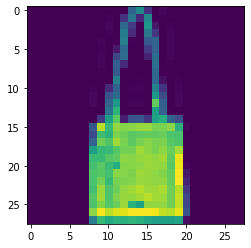

In [8]:
# image = np.asarray(train_im[200]).squeeze()
image = np.asarray(train_im[200])
plt.imshow(image)
plt.show()

In [11]:
print(train_labels.shape)
print(train_im.shape)
print(test_labels.shape)
print(test_im.shape)

(60000, 1)
(60000, 28, 28, 1)
(10000, 1)
(10000, 28, 28, 1)


In [9]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
#make sure data is balanced 
Dictionary_counts = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
total = 0
for i in train_labels:
    digit = i[0]
    Dictionary_counts[digit] +=1
    total +=1
for key in range(10):
    Dictionary_counts[key] = Dictionary_counts[key]/total
print(Dictionary_counts)

{0: 0.1, 1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.1, 6: 0.1, 7: 0.1, 8: 0.1, 9: 0.1}


In [ ]:
# data is perfectly balanced. 

In [61]:
# change everything to torch and do image preprocessing 
# Data Processing
#scaling 
# reshape the data to be able to be scaled 
Train_Im_Reshaped = train_im.reshape(train_im.shape[0],28*28)
Test_Im_Reshaped = test_im.reshape(test_im.shape[0],28*28)
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(Train_Im_Reshaped)
Train_Im_Scaled = scl.transform(Train_Im_Reshaped)
Test_Im_Scaled = scl.transform(Test_Im_Reshaped)
#reshape data back to images 
# Train_Im_2d_np = Train_Im_Scaled.reshape(Train_Im_Scaled.shape[0], 28,28,1)
# Test_Im_2d_np  = Test_Im_Scaled.reshape(Test_Im_Scaled.shape[0],28,28,1)
#change all to tensors 
X_train_all = torch.from_numpy(Train_Im_Scaled)
X_test = torch.from_numpy(Test_Im_Scaled)
y_Train_all = torch.from_numpy(train_labels)
y_test = torch.from_numpy(test_labels)
#one hot encoding the test labels labels 
############################# NOt gonan one hot before deciding on the loss funciton#######################################################
# y_test_one_hot = F.one_hot(y_test)
# y_train_all_one_hot = F.one_hot(y_Train_all)
# Train validation split 
X_Train,X_Val,Y_Train,Y_Val = train_test_split(X_train_all,y_Train_all, test_size=0.1, random_state=42, shuffle = True)
#Changing shape again to feed into the network 
X_Train=X_Train.view([X_Train.shape[0],1,28,28])
X_Val=X_Val.view([X_Val.shape[0],1,28,28])
X_Train.shape

torch.Size([54000, 1, 28, 28])

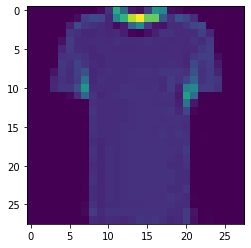

In [62]:
# image = np.asarray(train_im[200]).squeeze()
image = X_Train[200].view(28,28)
plt.imshow(image)
plt.show()

In [64]:
# I want to try the data loader 
x = (X_Train,Y_Train)

In [65]:
x

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

## Another method using the dataset in torch 

In [18]:
import torch
from torchvision import datasets, transforms
# import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('/F_MNIST_data/', download=True, train=True, transform=transform)

testset = datasets.FashionMNIST('/F_MNIST_data/', download=True, train=False, transform=transform)


Extracting /F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to /F_MNIST_data/FashionMNIST\raw


Extracting /F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to /F_MNIST_data/FashionMNIST\raw



Extracting /F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /F_MNIST_data/FashionMNIST\raw


Extracting /F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /F_MNIST_data/FashionMNIST\raw
Processing...


C:\Users\skypi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [79]:
train_set, val_set = torch.utils.data.random_split(trainset, [50000, 10000])
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [78]:
# valloader   = torch.utils.data.DataLoader(val_set, batch=64, shuffle = True)


In [56]:
trainset[1][0]     #trainset trainset[i][i]    gives you one image , trainset[0][1] gives you one label
trainset[1];
# trainset[i] is a tuple with (image, label) trainset[i][j] - gives you the ith sample and j =0,1 , 0 for image and 1 for label -- SAME WITH test set

In [73]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

tensor(5)


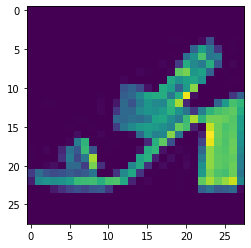

In [36]:
image,label = next(iter(trainloader))
plt.imshow(image[0,:].view(28,28))
print(label[0])

In [ ]:
## Python next() function is used to fetch next item from the collection. It takes two arguments an iterator and a default value and returns an element. 

In [34]:
image, label = next(iter(trainloader))
print(image.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [67]:
len(trainset)

60000